### Digital Image Processing 

Student: Anderson Rafhael; 18113000

Frequency Domain Filtering

In [50]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cv2 as cv

In [51]:
# General Functions

def showImages(original, result, tittle):
    
    normResult = cv.normalize(result, None, 0, 255, cv.NORM_MINMAX)
    
    plt.figure()
    plt.subplots(figsize=(10, 7))
    
    
    plt.subplot(121)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB)) 
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122) 
    plt.imshow(normResult, cmap='gray')
    plt.title(tittle)
    plt.xticks([]), plt.yticks([])
    
    plt.show()
    
def plot_histogram(img):
    # Grayscale image
    if len(img.shape) == 2:
        hist = cv.calcHist([img], [0], None, [256], [0, 256])
        plt.plot(hist, color='k')
        plt.show()
    # Color image
    elif len(img.shape) == 3:
        color = ('r', 'g', 'b')
        for i, col in enumerate(color):
            hist = cv.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
            
    plt.show()
    return None

1. Obtenha a transformada rápida de Fourier usando OpenCV e o Numpy

In [52]:
img = cv.imread('images/girl.jpg', 0)

f = np.fft.fft2(img)
print(f)

[[ 1.39762460e+08      +0.j         -3.23511982e+07+1134596.92393528j
  -2.95627308e+06 +977372.41537942j ...  4.67823352e+06-1019147.38259353j
  -2.95627308e+06 -977372.41537942j -3.23511982e+07-1134596.92393528j]
 [-2.49765550e+06-6330605.21343378j -1.07014494e+06-5001322.65322608j
  -2.20612723e+06+7524078.74787367j ...  1.29614112e+06-4525884.63016103j
   3.54832573e+06+2165084.3496969j   4.82418948e+06-5358699.55519905j]
 [-9.63972144e+06-6321622.46999179j -4.70839084e+05+2766983.86390906j
   3.31376461e+06 +298149.96616168j ...  2.67522510e+06-3511954.86970145j
   1.85179746e+06+5572095.33356533j -3.32032387e+06+2867538.10269736j]
 ...
 [ 2.81032455e+06+1547893.43165033j  2.47138373e+06-1569899.94390569j
  -1.44589865e+06 -229136.29713712j ... -2.23135011e+05+3201480.30876115j
  -2.24855466e+06 +120050.23048827j  4.39724654e+05 +178142.47888172j]
 [-9.63972144e+06+6321622.46999179j -3.32032387e+06-2867538.10269736j
   1.85179746e+06-5572095.33356533j ...  1.34693550e+05+2065217.4

2. Apresente as imagens. Mostre as imagens com e sem o fftshift

<Figure size 640x480 with 0 Axes>

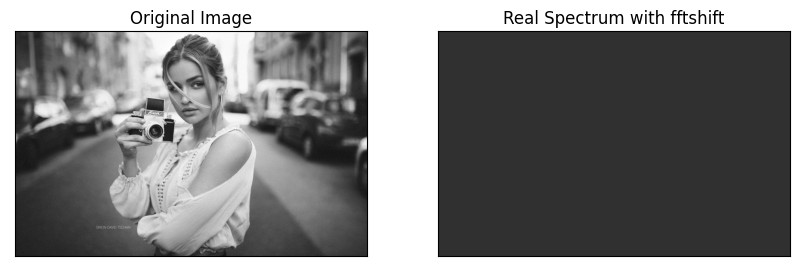

<Figure size 640x480 with 0 Axes>

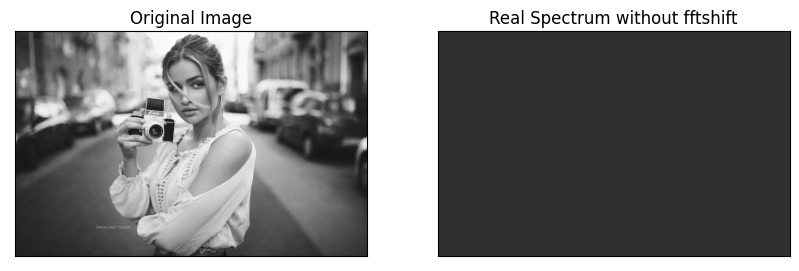

<Figure size 640x480 with 0 Axes>

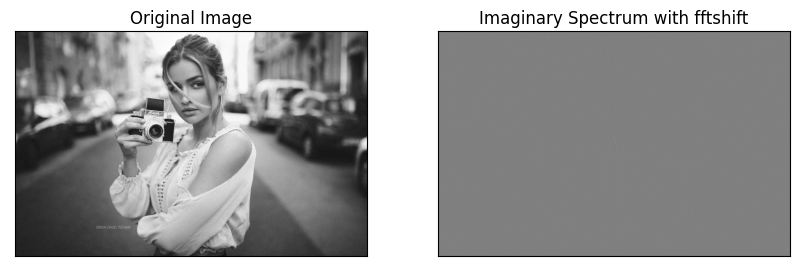

<Figure size 640x480 with 0 Axes>

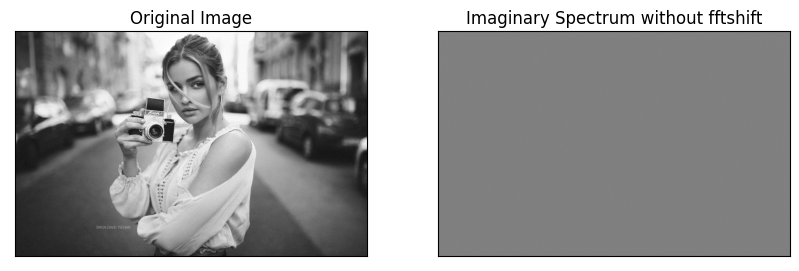

<Figure size 640x480 with 0 Axes>

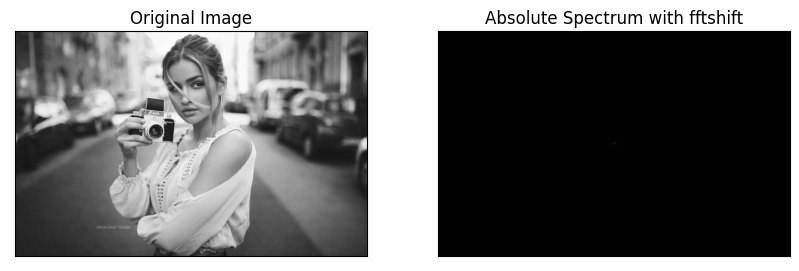

<Figure size 640x480 with 0 Axes>

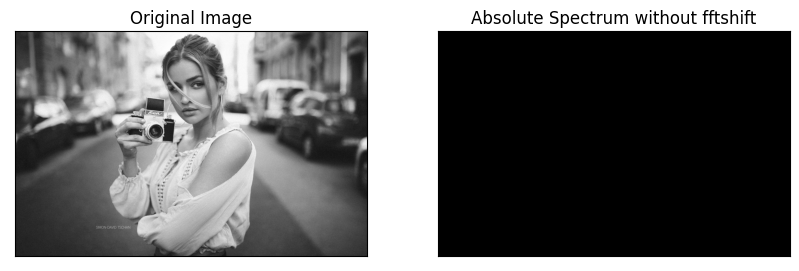

In [60]:
img = cv.imread('images/girl.jpg', 0)

# Real Part
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
dst = (np.real(fshift))
showImages(img, dst, "Real Spectrum with fftshift")

f = np.fft.fft2(img)
dst = (np.real(f))
showImages(img, dst, "Real Spectrum without fftshift")

# Imaginary Part
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
dst = (np.imag(fshift))
showImages(img, dst, "Imaginary Spectrum with fftshift")

f = np.fft.fft2(img)
dst = (np.imag(f))
showImages(img, dst, "Imaginary Spectrum without fftshift")

# Absolute Part
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
dst = (np.abs(fshift))
showImages(img, dst, "Absolute Spectrum with fftshift")

f = np.fft.fft2(img)
dst = (np.abs(f))
showImages(img, dst, "Absolute Spectrum without fftshift")

3. Efetue um escalonamento adequado da parte absoluta para melhor visualizar as baixas frequências

<Figure size 640x480 with 0 Axes>

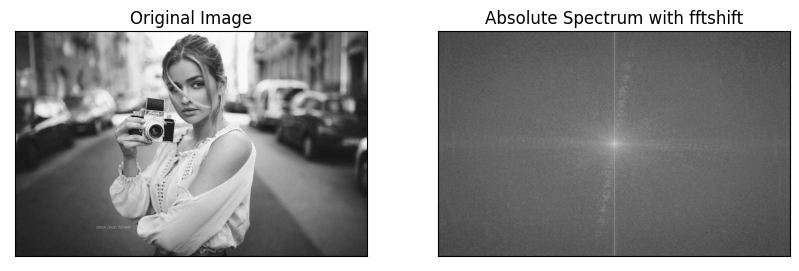

<Figure size 640x480 with 0 Axes>

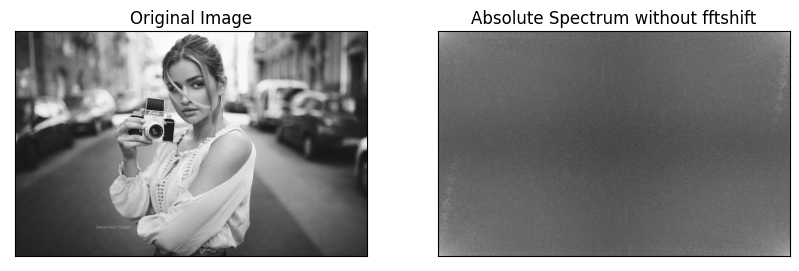

In [62]:
img = cv.imread('images/girl.jpg', 0)

# Absolute Part
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
dst = 20*np.log(1+np.abs(fshift))
showImages(img, dst, "Absolute Spectrum with fftshift")

f = np.fft.fft2(img)
dst = 20*np.log(1+np.abs(f))
showImages(img, dst, "Absolute Spectrum without fftshift")

4. Crie um filtro passa-baixas com resposta em frequência |H(u, v)| e apresente o resultado da filtragem da imagem f(x, y) por esse filtro

<Figure size 640x480 with 0 Axes>

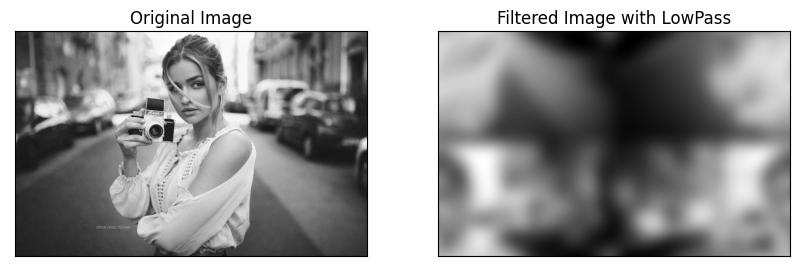

In [83]:
img = cv.imread('images/girl.jpg', 0)

f = np.fft.fft2(img)

#Gaussian: Low Pass Filter
M, N = img.shape
H = np.zeros((M, N), dtype=np.float32)
D0 = 30
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

fH = np.fft.fft2(H)
lpfImage = f * fH

dst = np.abs(np.fft.ifft2(lpfImage))


showImages(img, dst, "Filtered Image with LowPass")

5. Faça o mesmo para um filtro passa-altas

<Figure size 640x480 with 0 Axes>

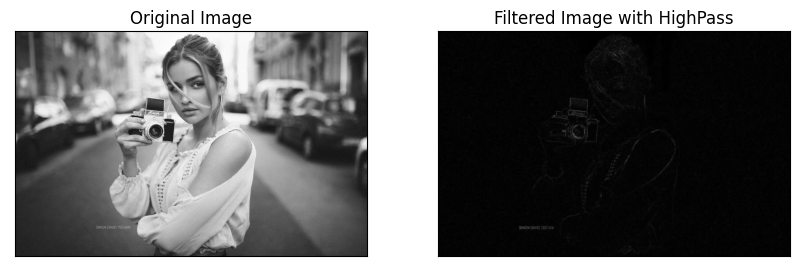

In [84]:
img = cv.imread('images/girl.jpg', 0)

f = np.fft.fft2(img)

M, N = img.shape
H = np.array([[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]])

fH = np.fft.fft2(H, (M, N))
hpfImage = f * fH

dst = np.abs(np.fft.ifft2(hpfImage))

showImages(img, dst, "Filtered Image with HighPass")


